In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [6]:
df = pd.read_csv('../data/trek_data.csv')
raw_data = df.copy()

In [7]:
df.head()

,Trek_ID,Trek_Name,Location,Date,Difficulty,Capacity,Registered,Attended,Price_Per_Person,Total_Revenue,Operational_Cost,Profit,Marketing_Channel,Cancellations,Avg_Feedback
0,1,Mount Sumel Sunrise Trek,Mount Sumel,2025-01-14,Moderate,40,38,36,999,35964,18000,17964,Instagram,2,4.6
1,2,Ban Ki Ghati Forest Trek,Ban ki ghati,2025-02-04,Easy,35,32,31,899,27869,14000,13869,WhatsApp,1,4.4
2,3,Raghunath Fort Heritage Trek,Raghunath fort,2025-02-18,Easy,50,46,45,799,35955,12000,23955,Instagram,1,4.7
3,4,Saan Valley Green Trail,Saan valley,2025-03-03,Moderate,45,42,40,1099,43960,19000,24960,Instagram,2,4.5
4,5,Achrol Hills Explorer Trek,Achrol trek,2025-03-16,Moderate,40,36,34,999,33966,17000,16966,WhatsApp,2,4.3


In [8]:
df.isnull().sum()

Trek_ID              0
Trek_Name            0
Location             0
Date                 0
Difficulty           0
Capacity             0
Registered           0
Attended             0
Price_Per_Person     0
Total_Revenue        0
Operational_Cost     0
Profit               0
Marketing_Channel    0
Cancellations        0
Avg_Feedback         0
dtype: int64

There are no null values in the dataset.

In [9]:
df.nunique()

Trek_ID              20
Trek_Name            20
Location              6
Date                 20
Difficulty            3
Capacity              6
Registered           13
Attended             18
Price_Per_Person      7
Total_Revenue        18
Operational_Cost     14
Profit               19
Marketing_Channel     3
Cancellations         3
Avg_Feedback          9
dtype: int64

Now we can see the unique values in each attribute

In [10]:
df.columns, df.shape

(Index(['Trek_ID', 'Trek_Name', 'Location', 'Date', 'Difficulty', 'Capacity',
        'Registered', 'Attended', 'Price_Per_Person', 'Total_Revenue',
        'Operational_Cost', 'Profit', 'Marketing_Channel', 'Cancellations',
        'Avg_Feedback'],
       dtype='object'),
 (20, 15))

There are 20 rows and 15 different columns in the dataset.

In [11]:
df['Location'].nunique(), df['Location'].value_counts()

(6,
 Location
 Mount Sumel       4
 Saan valley       4
 Ban ki ghati      3
 Raghunath fort    3
 Achrol trek       3
 Chabutra trek     3
 Name: count, dtype: int64)

So there are 6 different trek locations.

In [12]:
df = df.copy()

In [13]:
df['Profit %'] = df['Profit'] / df['Total_Revenue'] * 100

In [14]:
df.head()

,Trek_ID,Trek_Name,Location,Date,Difficulty,Capacity,Registered,Attended,Price_Per_Person,Total_Revenue,Operational_Cost,Profit,Marketing_Channel,Cancellations,Avg_Feedback,Profit %
0,1,Mount Sumel Sunrise Trek,Mount Sumel,2025-01-14,Moderate,40,38,36,999,35964,18000,17964,Instagram,2,4.6,49.949950
1,2,Ban Ki Ghati Forest Trek,Ban ki ghati,2025-02-04,Easy,35,32,31,899,27869,14000,13869,WhatsApp,1,4.4,49.764972
2,3,Raghunath Fort Heritage Trek,Raghunath fort,2025-02-18,Easy,50,46,45,799,35955,12000,23955,Instagram,1,4.7,66.624948
3,4,Saan Valley Green Trail,Saan valley,2025-03-03,Moderate,45,42,40,1099,43960,19000,24960,Instagram,2,4.5,56.778890
4,5,Achrol Hills Explorer Trek,Achrol trek,2025-03-16,Moderate,40,36,34,999,33966,17000,16966,WhatsApp,2,4.3,49.949950


In [15]:
df['Occupancy Rate'] = df['Attended'] / df['Capacity'] * 100

In [17]:
df['Cancellation Rate'] = df['Cancellations'] / df['Registered']

### Revenue by trek locations-

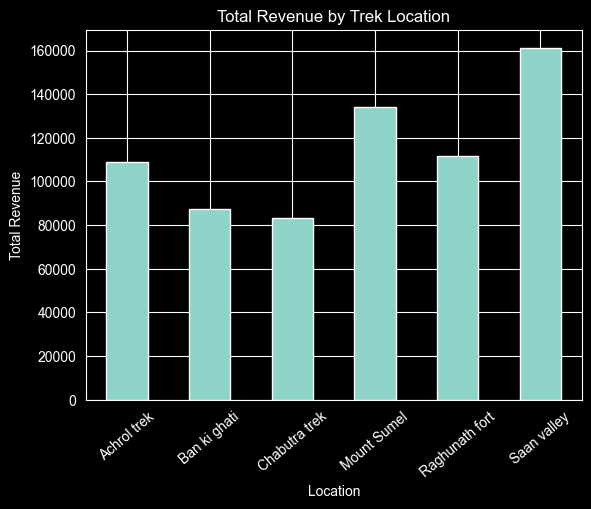

In [18]:
revenue_by_location = df.groupby("Location")["Total_Revenue"].sum()

plt.figure()
revenue_by_location.plot(kind="bar")
plt.title("Total Revenue by Trek Location")
plt.xlabel("Location")
plt.ylabel("Total Revenue")
plt.xticks(rotation=40)
# plt.tight_layout()
plt.show()

From the above chart we can draw the conclusion that Saan valley made the most revenue and its followed by Mount Sumel. So these treks can be prioritised more in the future to make more revenues

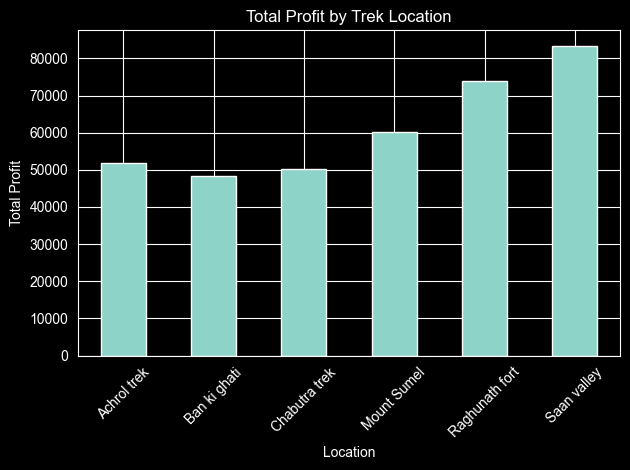

In [19]:
profit_by_location = df.groupby("Location")["Profit"].sum()

plt.figure()
profit_by_location.plot(kind="bar")
plt.title("Total Profit by Trek Location")
plt.xlabel("Location")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above chart, we can see that saan valley is the most profitable location followed by Raghynath fort. Though raghunath fort didnt made the most revenue but its profitable because of low operational costs.


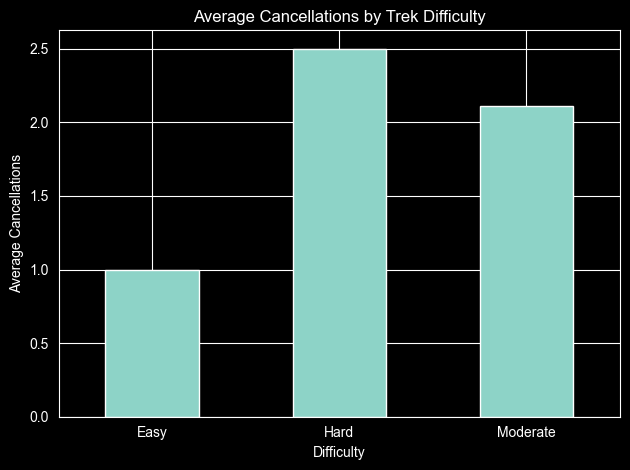

In [20]:
avg_cancellations = df.groupby("Difficulty")["Cancellations"].mean()

plt.figure()
avg_cancellations.plot(kind="bar")
plt.title("Average Cancellations by Trek Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Average Cancellations")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the above chart we can conclude that the harder the treks are the more are the cancellation rates.

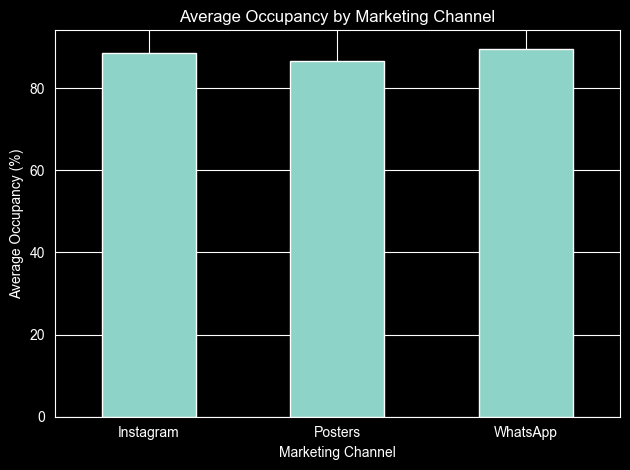

In [21]:
avg_occupancy = df.groupby("Marketing_Channel")["Occupancy Rate"].mean()

plt.figure()
avg_occupancy.plot(kind="bar")
plt.title("Average Occupancy by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Average Occupancy (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

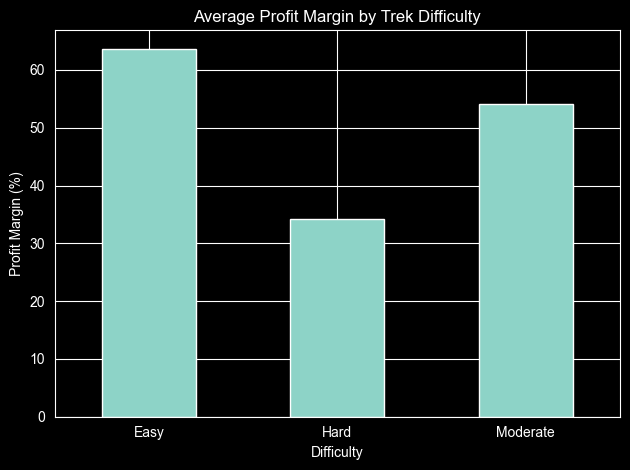

In [22]:
profit_margin_by_difficulty = df.groupby("Difficulty")["Profit %"].mean()

plt.figure()
profit_margin_by_difficulty.plot(kind="bar")
plt.title("Average Profit Margin by Trek Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Easy treks are generally more profitable than the hard ones.

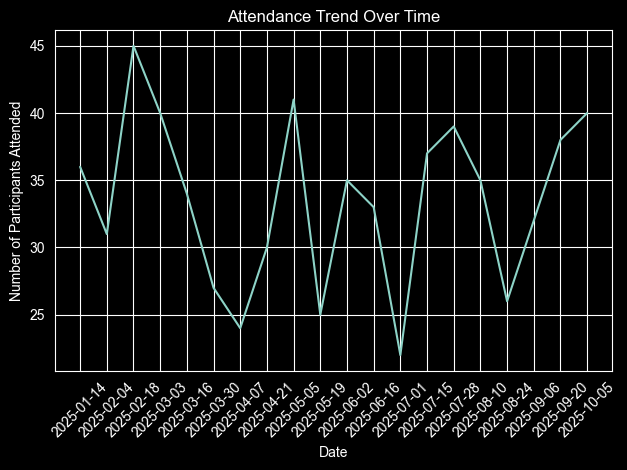

In [23]:
df_sorted = df.sort_values("Date")

plt.figure()
plt.plot(df_sorted["Date"], df_sorted["Attended"])
plt.title("Attendance Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Participants Attended")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Trek participation peaks in the month of February and is lowest in the month of August. So more events could be scheduled in the months of February and March to maximize participation and revenue.

## Executive Summary
The table below highlights the key operational insights derived from the trek data analysis.

In [40]:
profit_by_location = df.groupby("Location")["Profit"].sum()
best_location = profit_by_location.idxmax()
best_location_profit = profit_by_location.max()

In [41]:
occupancy_by_channel = df.groupby("Marketing_Channel")["Occupancy"].mean()
best_channel = occupancy_by_channel.idxmax()
best_channel_occupancy = occupancy_by_channel.max()

In [42]:
cancel_rate_by_difficulty = (
    df.groupby("Difficulty")["Cancellations"].sum() /
    df.groupby("Difficulty")["Registered"].sum()
) * 100

most_risky_difficulty = cancel_rate_by_difficulty.idxmax()
highest_cancel_rate = cancel_rate_by_difficulty.max()

In [45]:
summary = pd.DataFrame({
    "Metric": [
        "Best Performing Location (Profit)",
        "Best Marketing Channel (Occupancy)",
        "Most Risky Difficulty (Cancellations)",
    ],
    "Result": [
        f"{best_location} (₹{int(best_location_profit)})",
        f"{best_channel} ({best_channel_occupancy:.1f}%)",
        f"{most_risky_difficulty} ({highest_cancel_rate:.1f}%)",
    ]
})

summary

,Metric,Result
0,Best Performing Location (Profit),Saan valley (₹83360)
1,Best Marketing Channel (Occupancy),WhatsApp (89.6%)
2,Most Risky Difficulty (Cancellations),Hard (9.3%)
